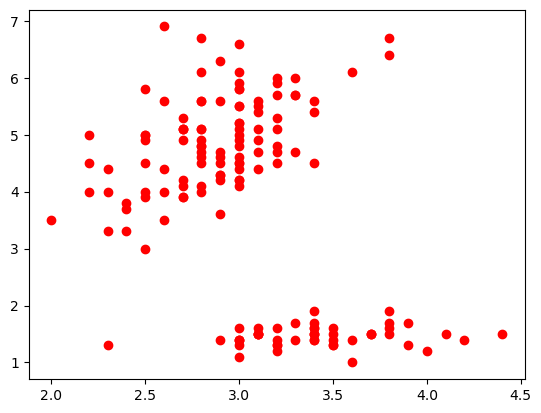

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
f=open('iris.data')
data=pd.read_csv('iris.data')
data=data.to_numpy()


# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Encode the last column
df.iloc[:, -1] = df.iloc[:, -1].astype("category").cat.codes

# Convert back to NumPy array (optional)
data = df.to_numpy()
y_train,x_train=data[:,-1],data[:,1:4]
l=[]
for i in range(len(y_train)):
    if y_train[i]>1:
        break
    l.append(y_train[i])
plt.scatter(x_train[:,0],x_train[:,1],c='r')
plt.show()
l=np.array(l)
    

In [93]:
#Sigmoid function
def sigmoid(f_wb):
    f_wb=1/(1+np.exp(-f_wb))
    return f_wb


In [94]:
#Linear regression function without regularization
a=0.01 #alpha for regularization
L=0.04
w=np.zeros(x_train.shape[1])
b=0
def linear(x_train,l,w,b,L):
    m=x_train.shape[1]
    loss=0
    cost=0
    for i in range(len(l)):
        f_wb=np.dot(x_train[i],w)+b
        z=sigmoid(f_wb)
        loss=-l[i]*np.log(z)-(1-l[i])*np.log(1-z)
        cost+=loss
        for j in range(m):
            w[j]-=L*(1/len(l)*((z-l[i])*x_train[i,j]))
        b-=L*(1/len(l)*(z-l[i]))
    cost=cost/len(l)
    return w,b,cost

        
    
    

In [95]:
#Training model with 1000 iterations
costl=[] #List for plotting the cost function
def train(x_train,l,w,b,L):
    iterations=1000
    for epoch in range(iterations):
        w,b,cost=linear(x_train,l,w,b,L)
        if epoch%100==0:
            print('epoch=', epoch,'cost=', cost)
        costl.append(cost)
train(x_train,l,w,b,L) 

epoch= 0 cost= 0.6807429994006523
epoch= 100 cost= 0.16090227605169774
epoch= 200 cost= 0.08776158466743127
epoch= 300 cost= 0.06043373327944895
epoch= 400 cost= 0.04623151098822442
epoch= 500 cost= 0.03753323952390101
epoch= 600 cost= 0.03165474735318909
epoch= 700 cost= 0.027412465432397448
epoch= 800 cost= 0.024204061273989264
epoch= 900 cost= 0.021690769960789415


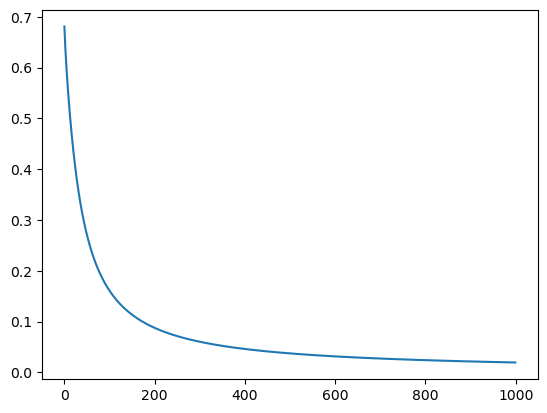

In [96]:
plt.plot(range(len(costl)),costl)
plt.show()

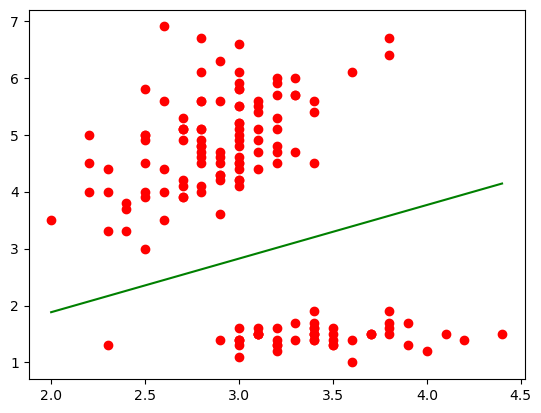

In [97]:
plt.scatter(x_train[:,0],x_train[:,1],c='r')
x1_values = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 100)
x2_values = -(w[0] / w[1]) * x1_values - (b / w[1])
plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')
plt.show()